<a href="https://colab.research.google.com/github/Group4Columbia/TeamProject_Group4/blob/Jodi-Ann/Data_Cleaning_Starter_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #test 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import sqlite3
%matplotlib inline

In [ ]:
# Vaccination data
data = 'https://covid.ourworldindata.org/data/owid-covid-data.xlsx'
vaccination = 'https://raw.githubusercontent.com/Group4Columbia/TeamProject_Group4/main/Resources/vaccination.csv'
education ='https://raw.githubusercontent.com/Group4Columbia/TeamProject_Group4/main/Resources/covid_impact_education.csv'


In [ ]:
data_df = pd.read_excel(data)
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
hospitalization_data_df = data_df.copy()

In [ ]:
data_df.drop(data_df.columns[data_df.apply(lambda col: col.isnull().sum() > 60,000)], axis=1)
data_df.sample(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
50344,PAN,North America,Panama,2021-01-07,269091.0,4135.0,3185.857,4321.0,38.0,42.714,62365.114,958.337,738.361,1001.444,8.807,9.900,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16136.0,1387729.0,321.623,3.740,12178.0,2.822,0.262,3.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.85,4.314768e+06,55.133,29.7,7.918,5.030,22267.037,2.2,128.346,8.33,2.4,9.9,NaN,2.30,78.51,0.815
6596,BLR,Europe,Belarus,2020-11-04,102313.0,984.0,966.857,995.0,3.0,3.714,10827.550,104.134,102.320,105.299,0.317,0.393,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2573132.0,272.309,NaN,22105.0,2.339,0.044,22.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,9.449321e+06,46.858,40.3,14.799,9.788,17167.967,NaN,443.129,5.18,10.5,46.1,NaN,11.00,74.79,0.823
12067,CAN,North America,Canada,2020-10-17,197067.0,139.0,2042.857,9836.0,8.0,20.286,5221.403,3.683,54.127,260.610,0.212,0.537,1.15,202.0,5.352,1027.0,27.211,NaN,NaN,NaN,NaN,67055.0,8625475.0,228.537,1.777,67790.0,1.796,0.030,33.2,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.43,3.774216e+07,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.929
59791,OWID_SAM,NaN,South America,2020-03-18,1220.0,242.0,154.857,8.0,2.0,1.000,2.832,0.562,0.359,0.019,0.005,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34722,OWID_KOS,Europe,Kosovo,2020-08-27,12981.0,141.0,139.286,498.0,6.0,8.571,6716.253,72.952,72.065,257.661,3.104,4.435,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,1.932774e+06,168.155,NaN,NaN,NaN,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21232,EST,Europe,Estonia,2021-01-14,35621.0,630.0,552.857,311.0,10.0,6.571,26852.584,474.920,416.767,234.445,7.538,4.954,1.01,44.0,33.169,401.0,302.290,NaN,NaN,NaN,NaN,4283.0,704388.0,530.997,3.229,4847.0,3.654,0.114,8.8,tests performed,14879.0,NaN,NaN,1398.0,1178.0,1.12,NaN,NaN,888.0,50.00,1.326539e+06,31.033,42.7,19.452,13.491,29481.252,0.5,255.569,4.02,24.5,39.3,NaN,4.69,78.74,0.892
67458,UKR,Europe,Ukraine,2020-12-16,945218.0,11057.0,11032.429,16314.0,276.0,230.286,21613.006,252.825,252.263,373.030,6.311,5.266,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5125389.0,117.195,NaN,35555.0,0.813,0.310,3.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.57,4.373376e+07,77.390,41.4,16.462,11.133,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.80,72.06,0.779
49923,PSE,Asia,Palestine,2020-11-05,56672.0,582.0,585.857,508.0,4.0,5.000,11109.072,114.086,114.842,99.580,0.784,0.980,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5448.0,NaN,NaN,1.068,4759.0,0.933,0.123,8.1,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74,5.101416e+06,778.202,20.4,3.043,1.726,4449.898,1.0,265.910,10.59,NaN,NaN,NaN,NaN,74.0

In [ ]:
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.sample(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48888,OWID_OCE,NaN,Oceania,2021-01-14,31826.0,28.0,27.286,945.0,0.0,0.000,745.727,0.656,0.639,22.143,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42677809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,DJI,Africa,Djibouti,2020-10-20,5499.0,30.0,10.143,61.0,0.0,0.000,5565.778,30.364,10.266,61.741,0.000,0.000,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,988002.0,41.285,25.4,4.213,2.380,2705.406,22.5,258.037,6.05,1.7,24.5,NaN,1.40,67.11,0.524
21847,ETH,Africa,Ethiopia,2020-10-14,86430.0,712.0,790.714,1312.0,7.0,8.143,751.803,6.193,6.878,11.412,0.061,0.071,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7121.0,1370095.0,11.918,0.062,6990.0,0.061,0.113,8.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,114963583.0,104.957,19.8,3.526,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.960,0.30,66.60,0.485
41627,MUS,Africa,Mauritius,2020-07-27,344.0,0.0,0.143,10.0,0.0,0.000,270.490,0.000,0.112,7.863,0.000,0.000,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.67,1271767.0,622.962,37.4,10.945,5.884,20292.745,0.5,224.644,22.02,3.2,40.7,NaN,3.40,74.99,0.804
4131,AUS,Oceania,Australia,2021-01-20,28749.0,9.0,12.714,909.0,0.0,0.000,1127.417,0.353,0.499,35.647,0.000,0.000,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47494.0,1.863,0.000,3735.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.09,25499881.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
32414,ITA,Europe,Italy,2020-06-02,233515.0,318.0,422.857,33530.0,55.0,82.143,3862.189,5.260,6.994,554.565,0.910,1.359,0.64,408.0,6.748,6324.0,104.595,NaN,NaN,NaN,NaN,52159.0,3962292.0,65.534,0.863,60338.0,0.998,0.007,142.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,60461828.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
22495,OWID_EUN,NaN,European Union,2020-05-07,1042926.0,8317.0,7639.000,113026.0,1171.0,1225.571,2344.080,18.693,17.169,254.037,2.632,2.755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444919060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37149,LBR,Africa,Liberia,2020-07-31,1186.0,5.0,7.286,75.0,2.0,0.571,234.495,0.989,1.441,14.829,0.395,0.113,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.81,5057677.0,49.127,19.2,3.057,1.756,752.788,38.6,272.509,2.42,1.5,18.1,1.188,0.80,64.10,0.480
5047,BHS,North America,Bahamas,2020-08-01,599.0,25.0,39.000,14.0,0.0,0.429,1523.212,63.573,99.174,35.601,0.000,1.090,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
data_df[['iso_code', 'continent', 'location', 'tests_units']] = data_df[['iso_code', 'continent', 'location', 'tests_units']].astype(str)
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
covid = data_df[['total_vaccinations','people_vaccinated', 'total_deaths', 'total_cases','new_cases','population_density','aged_65_older','gdp_per_capita','cardiovasc_death_rate',	'diabetes_prevalence','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid.head()

,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NaN,NaN,NaN,1.0,1.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
1,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
2,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
3,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
4,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511


In [ ]:
correlation_matrix = covid.corr()
print(correlation_matrix)

                            total_vaccinations  ...  human_development_index
total_vaccinations                    1.000000  ...                -0.150204
people_vaccinated                     0.995429  ...                -0.165021
total_deaths                          0.797524  ...                 0.041503
total_cases                           0.799128  ...                 0.034969
new_cases                             0.549066  ...                 0.044485
population_density                   -0.043020  ...                 0.151805
aged_65_older                        -0.110977  ...                 0.778925
gdp_per_capita                       -0.077904  ...                 0.753135
cardiovasc_death_rate                 0.018444  ...                -0.430572
diabetes_prevalence                   0.059055  ...                 0.237351
hospital_beds_per_thousand           -0.107743  ...                 0.558330
life_expectancy                      -0.192219  ...                 0.914444

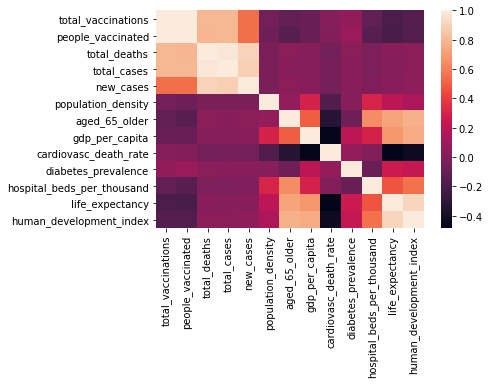

In [ ]:
sn.heatmap(correlation_matrix)
plt.show()

In [ ]:
data_df.dtypes

In [ ]:
covid_data_df.isna().sum()

In [ ]:
covid_data_df.head()

In [ ]:
data_df.isna().sum()

In [ ]:
data_df.dtypes

In [ ]:
## Use for #3 
vaccination_df = pd.read_csv(vaccination, delimiter=',', skiprows=0, low_memory=False)
vaccination_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,#country+name,#country+code,#date,#total+vaccinations,NaN,NaN,NaN,#total+vaccinations+daily,NaN,NaN,NaN,NaN
1,Albania,ALB,2021-01-10,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
2,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN,22.0
3,Albania,ALB,2021-01-12,128,128.0,NaN,NaN,64,0.00,0.00,NaN,22.0
4,Albania,ALB,2021-01-13,188,188.0,NaN,60.0,63,0.01,0.01,NaN,22.0


In [ ]:
vaccination_df.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                      object
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                      object
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

In [ ]:
education1 = pd.read_csv(education,  delimiter=',', skiprows=0, low_memory=False,error_bad_lines=False)
education1.head()

,Date,ISO,Country,Status,Note
0,16/02/2020,ABW,Aruba,Fully open,NaN
1,16/02/2020,AFG,Afghanistan,Fully open,NaN
2,16/02/2020,AGO,Angola,Fully open,NaN
3,16/02/2020,AIA,Anguilla,Fully open,NaN
4,16/02/2020,ALB,Albania,Fully open,NaN


In [ ]:
education1.dtypes

Date       object
ISO        object
Country    object
Status     object
Note       object
dtype: object

In [ ]:
# ChangeDates to date time for all dataset
education1['Date'] = pd.to_datetime(education1['Date'])
education1.head()

,Date,ISO,Country,Status,Note
0,2020-02-16,ABW,Aruba,Fully open,NaN
1,2020-02-16,AFG,Afghanistan,Fully open,NaN
2,2020-02-16,AGO,Angola,Fully open,NaN
3,2020-02-16,AIA,Anguilla,Fully open,NaN
4,2020-02-16,ALB,Albania,Fully open,NaN


In [ ]:
education1.dtypes

Date       datetime64[ns]
ISO                object
Country            object
Status             object
Note               object
dtype: object

In [ ]:
education1[['iso_code', 'date']] = education1[['ISO', 'Date']]
education1.head()

,Date,ISO,Country,Status,Note,iso_code,date
0,2020-02-16,ABW,Aruba,Fully open,NaN,ABW,2020-02-16
1,2020-02-16,AFG,Afghanistan,Fully open,NaN,AFG,2020-02-16
2,2020-02-16,AGO,Angola,Fully open,NaN,AGO,2020-02-16
3,2020-02-16,AIA,Anguilla,Fully open,NaN,AIA,2020-02-16
4,2020-02-16,ALB,Albania,Fully open,NaN,ALB,2020-02-16


In [ ]:
education_df = education1.drop(columns=["ISO",], axis=1)
education_df.head()

,Date,Country,Status,Note,iso_code,date
0,2020-02-16,Aruba,Fully open,NaN,ABW,2020-02-16
1,2020-02-16,Afghanistan,Fully open,NaN,AFG,2020-02-16
2,2020-02-16,Angola,Fully open,NaN,AGO,2020-02-16
3,2020-02-16,Anguilla,Fully open,NaN,AIA,2020-02-16
4,2020-02-16,Albania,Fully open,NaN,ALB,2020-02-16


In [ ]:
education_new_df = education_df.drop(columns=["Date"], axis=1)
education_new_df.head()

,Country,Status,Note,iso_code,date
0,Aruba,Fully open,NaN,ABW,2020-02-16
1,Afghanistan,Fully open,NaN,AFG,2020-02-16
2,Angola,Fully open,NaN,AGO,2020-02-16
3,Anguilla,Fully open,NaN,AIA,2020-02-16
4,Albania,Fully open,NaN,ALB,2020-02-16


In [ ]:
covid = data_df[['total_vaccinations','people_vaccinated', 'total_cases','new_cases','stringency_index','population','population_density','median_age','aged_65_older',	'aged_70_older',	'gdp_per_capita',	'extreme_poverty','cardiovasc_death_rate',	'diabetes_prevalence','female_smokers',	'male_smokers',	'handwashing_facilities','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid.head()


,total_vaccinations,people_vaccinated,total_cases,new_cases,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NaN,NaN,1.0,1.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
covid_youth = data_df[['iso_code', 'date','total_vaccinations','people_vaccinated', 'total_deaths', 'total_cases','new_cases', 'new_deaths','population_density','gdp_per_capita', 'handwashing_facilities',	'diabetes_prevalence','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid_youth.head()

,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,2020-02-24,NaN,NaN,NaN,1.0,1.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
1,AFG,2020-02-25,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
2,AFG,2020-02-26,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
3,AFG,2020-02-27,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
4,AFG,2020-02-28,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511


In [ ]:
### Left Merge on Education and COVID data on iso_code and date
merged_left_df = pd.merge(left=education_new_df, right=covid_youth, how="left", on=["iso_code", "date"])

In [ ]:
merged_left_df.head()

,Country,Status,Note,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Aruba,Fully open,NaN,ABW,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Fully open,NaN,AFG,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,Fully open,NaN,AGO,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anguilla,Fully open,NaN,AIA,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Fully open,NaN,ALB,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_left_df.isna().sum()

Country                           0
Status                            0
Note                          85286
iso_code                          0
date                              0
total_vaccinations            84018
people_vaccinated             84352
total_deaths                  34323
total_cases                   26675
new_cases                     26676
new_deaths                    34323
population_density            26744
gdp_per_capita                28144
handwashing_facilities        56676
diabetes_prevalence           26525
hospital_beds_per_thousand    32142
life_expectancy               26136
human_development_index       27268
dtype: int64

In [ ]:
merged_left_df = merged_left_df.fillna(0)
merged_left_df.sample(20)

,Country,Status,Note,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
4014,Bermuda,Fully open,0,BMU,2020-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.000,0.00,0.000
67729,Liechtenstein,Academic break,0,LIE,2021-03-01,0.0,0.0,54.0,2575.0,8.0,0.0,237.012,0.000,0.000,7.77,2.397,82.49,0.919
36257,Nicaragua,Fully open,0,NIC,2020-06-08,0.0,0.0,46.0,1118.0,0.0,0.0,51.667,5321.444,0.000,11.47,0.900,74.48,0.660
65276,Sweden,Academic break,0,SWE,2020-12-22,0.0,0.0,7993.0,389439.0,22319.0,0.0,24.718,46949.283,0.000,4.79,2.220,82.80,0.945
71033,Denmark,Closed due to COVID-19,0,DNK,2021-01-19,181890.0,176936.0,1838.0,191299.0,725.0,32.0,136.520,46682.515,0.000,6.41,2.500,80.90,0.940
43031,Tunisia,Academic break,0,TUN,2020-07-09,0.0,0.0,50.0,1231.0,10.0,0.0,74.228,10849.297,78.687,8.52,2.300,76.70,0.740
38361,Nepal,Closed due to COVID-19,0,NPL,2020-08-16,0.0,0.0,104.0,26660.0,641.0,2.0,204.430,2442.804,47.782,7.26,0.300,70.78,0.602
18313,Cabo Verde,Closed due to COVID-19,0,CPV,2020-05-13,0.0,0.0,2.0,289.0,22.0,0.0,135.580,6222.554,0.000,2.42,2.100,72.98,0.665
23010,Mexico,Closed due to COVID-19,0,MEX,2020-04-06,0.0,0.0,125.0,2439.0,296.0,31.0,66.444,17336.469,87.847,13.06,1.380,75.05,0.779
53329,Uzbekistan,Fully open,0,UZB,2020-10-26,0.0,0.0,552.0,65667.0,360.0,3.0,76.134,6253.104,0.000,7.57,4.000,71.72,0.720


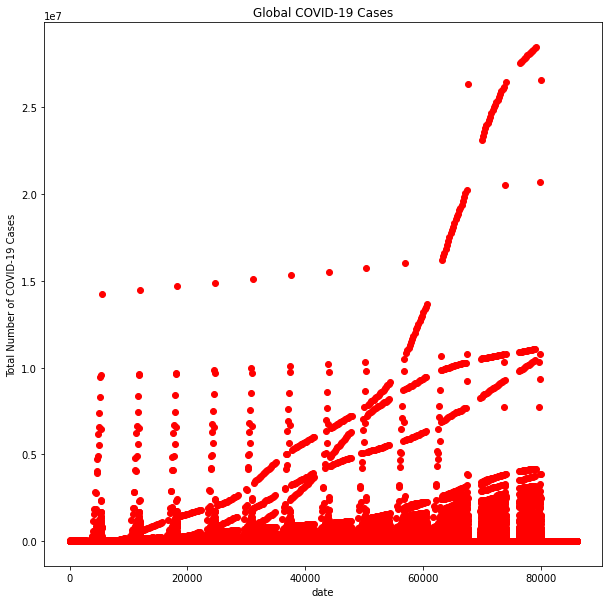

In [ ]:
# TEST
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_left_df['date']
# Add x-axis and y-axis
ax.scatter(merged_left_df.index.values,
        merged_left_df['total_cases'],
        color='red')
# Set title and labels for axes
ax.set(xlabel="date",
       ylabel="Total Number of COVID-19 Cases",
       title="Global COVID-19 Cases")
plt.show()

In [ ]:
 # Remove date element
 merged_left_df.groupby(["iso_code"]).sum()

,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
AFG,0.0,0.0,380054.0,10278471.0,50393.0,2174.0,18176.948,602531.658,12607.164,3203.06,167.00,21653.22,170.674
AGO,0.0,0.0,54429.0,2098671.0,18740.0,449.0,7429.790,1809862.945,8292.504,1225.34,0.00,19017.65,180.691
AIA,4103.0,4103.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,163.76,0.000
ALB,29874.0,13684.0,144699.0,7007334.0,89685.0,1552.0,34922.043,3930542.523,0.000,3356.64,962.37,26163.81,264.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0,0.0,0.0,174.0,3.0,0.0,5830.692,505810.788,0.000,773.64,0.00,6158.88,60.060
YEM,0.0,0.0,128314.0,449565.0,2117.0,598.0,15624.336,431910.924,14466.264,1562.20,204.40,19307.04,137.240
ZAF,385894.0,385894.0,4613063.0,175173725.0,1275554.0,41576.0,16270.392,4278616.848,15309.564,1920.96,807.36,22317.24,246.732


Creating Database from the Tables and only use pertinent fields

In [ ]:
#Create table with relevant data from the Vaccination, covid data and education files
conn = sqlite3.connect('GroupDB.db')  # You can create a new database by changing the name within the quotes
c = conn.cursor() # The database will be saved in the location where your 'py' file is saved


Columns to use: 'iso_code', 'date','total_vaccinations','people_vaccinated', 'total_deaths', 'total_cases','new_cases', 'new_deaths','population_density','gdp_per_capita', 'handwashing_facilities',	'diabetes_prevalence','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index'

In [ ]:
# Create Vaccination tables
c.execute('''CREATE TABLE Vaccination
              ([location] str,[iso_code] str, [date] date, [total_vaccinations] integer, [people_vaccinated] integer, [people_fully_vaccinated] integer,
              [daily_vaccinations_raw] integer, [daily_vaccinations] integer, [total_vaccinated_per_hundred] integer, [people_vaccinated_per_hundred] integer,
              [people_fully_vaccinated_per_hundred] integer, [daily_vaccinations_per_million] integer)''')

In [ ]:
# Create Covid tables
c.execute('''CREATE TABLE Covid
             ([iso_code] str, [date] date, [total_vaccinations] integer, [people_vaccinated] integer, [total_deaths] integer,
              [total_cases] integer, [new_cases] integer, [new_deaths] integer, [population_density] integer,
              [gdp_per_capita] integer, [handwashing_facilities] integer, [diabetes_prevalence] integer, [hospital_beds_per_thousands] integer,
              [life_expectancy] integer,[human_development_index] integer)''')

In [ ]:
# Create Education tables
c.execute('''CREATE TABLE Education
            ([iso_code] str, [date] date, [Country] str, [Status] str, [Note] str)''')

In [ ]:
conn.commit()